In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('../data/train-data.csv')
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
df.drop(columns=['Unnamed: 0', 'New_Price'], inplace=True)

# Name

In [4]:
df.Name.sample(10)

4077            Maruti Baleno LXI - BSIII
1597               Maruti Swift Vdi BSIII
2344         Maruti Baleno Zeta Automatic
2600                    Hyundai i20 Magna
4915                 Ford Figo Diesel EXI
264                Mercedes-Benz GLE 350d
622                   Honda Accord 2.4 MT
5527              Toyota Etios Liva 1.2 G
543     Chevrolet Enjoy TCDi LTZ 7 Seater
2647          Hyundai i20 1.2 Asta Option
Name: Name, dtype: object

`There is a pattern in the 'Name' column. The brand name appears first followed by the model name.
 We can extract them into separate columns.`

In [5]:
df.Name.str.contains('Land Rover').sum()

np.int64(60)

In [6]:
df.Name[df.Name.str.contains('Land Rover')].sample(5)

311               Land Rover Range Rover HSE Dynamic
4152                    Land Rover Range Rover 3.0 D
14                    Land Rover Freelander 2 TD4 SE
1460    Land Rover Range Rover Sport 2005 2012 Sport
3839    Land Rover Discovery 3 TDV6 Diesel Automatic
Name: Name, dtype: object

In [7]:
sample_car = df.loc[10, 'Name']
sample_car.split(' ')[0]  # Brand

'Maruti'

In [8]:
def get_brand(name):
    if name.startswith('Land Rover'):
        return 'Land Rover'
    return name.split(' ')[0]

sample_car = df.loc[1505, 'Name']
get_brand(sample_car)

'Land Rover'

In [9]:
df['Brand'] = df.Name.apply(get_brand)

In [10]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi


In [11]:
df[df.Name.str.contains('Land Rover')].sample(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
4466,Land Rover Freelander 2 SE,Kochi,2014,61730,Diesel,Automatic,First,12.39 kmpl,2179 CC,147.51 bhp,5.0,19.94,Land Rover
5022,Land Rover Freelander 2 TD4 SE,Hyderabad,2013,46000,Diesel,Automatic,Second,0.0 kmpl,2179 CC,115 bhp,5.0,26.00,Land Rover
3043,Land Rover Discovery Sport TD4 HSE,Coimbatore,2019,25899,Diesel,Automatic,First,12.63 kmpl,2179 CC,147.5 bhp,5.0,55.70,Land Rover
1988,Land Rover Freelander 2 SE,Mumbai,2012,34000,Diesel,Automatic,First,12.39 kmpl,2179 CC,147.51 bhp,5.0,19.25,Land Rover
5038,Land Rover Discovery Sport TD4 HSE 7S,Coimbatore,2019,24013,Diesel,Automatic,First,12.81 kmpl,1999 CC,148.31 bhp,7.0,56.14,Land Rover


In [12]:
import numpy as np
for i in np.random.randint(0, len(df), 5):
    sample_car = df.loc[i, 'Name']
    print(sample_car.split(' ')[1])   # MODEL

Alto
XF
Laura
i20
i20


In [13]:
sample_car = df[df.Name.str.contains('Land Rover')].reset_index().loc[50, 'Name']
print(sample_car)

Land Rover Discovery Sport TD4 HSE 7S


In [14]:
def get_model(name):
    if name.startswith('Land Rover Range Rover'):
        return 'Range Rover'
    elif name.startswith('Land Rover'):
        return name.split(' ')[2]
    else:
        return name.split(' ')[1]
    
df['Model'] = df.Name.apply(get_model)

In [15]:
df[df.Name.str.contains('Land Rover')].sample(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
1988,Land Rover Freelander 2 SE,Mumbai,2012,34000,Diesel,Automatic,First,12.39 kmpl,2179 CC,147.51 bhp,5.0,19.25,Land Rover,Freelander
1038,Land Rover Range Rover TDV8 (Diesel),Bangalore,2011,55000,Diesel,Automatic,First,10.2 kmpl,4367 CC,308 bhp,7.0,67.00,Land Rover,Range Rover
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,NaN,26.50,Land Rover,Range Rover
4687,Land Rover Freelander 2 TD4 SE,Jaipur,2012,119203,Diesel,Automatic,First,0.0 kmpl,2179 CC,115 bhp,5.0,16.50,Land Rover,Freelander
5545,Land Rover Range Rover Sport SE,Delhi,2014,47000,Diesel,Automatic,Second,12.65 kmpl,2993 CC,255 bhp,5.0,64.75,Land Rover,Range Rover


In [16]:
df.describe(include='O')

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Brand,Model
count,6019,6019,6019,6019,6019,6017,5983,5983,6019,6019
unique,1876,11,5,2,4,442,146,372,31,214
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp,Maruti,Swift
freq,49,790,3205,4299,4929,172,606,235,1211,353


In [17]:
df.drop(columns=['Name'], inplace=True)

# Kilometers_Driven

In [18]:
px.histogram(df, x='Kilometers_Driven', marginal='box', title='Km Distribution')

In [19]:
df[df.Kilometers_Driven == df.Kilometers_Driven.max()]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
2328,Chennai,2017,6500000,Diesel,Automatic,First,15.97 kmpl,2993 CC,258 bhp,5.0,65.0,BMW,X5


In [20]:
km_outlier = df[df.Kilometers_Driven == df.Kilometers_Driven.max()].index
df.drop(index=km_outlier, inplace=True)

In [21]:
px.histogram(df, x='Kilometers_Driven', marginal='box', title='Km Distribution')

# Fuel_Type

In [22]:
df.Fuel_Type.unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [23]:
df[df.Fuel_Type == 'Electric']

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
4446,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.00,Mahindra,E
4904,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,12.75,Toyota,Prius


In [24]:
df.isna().sum()

Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
Brand                 0
Model                 0
dtype: int64

<Axes: >

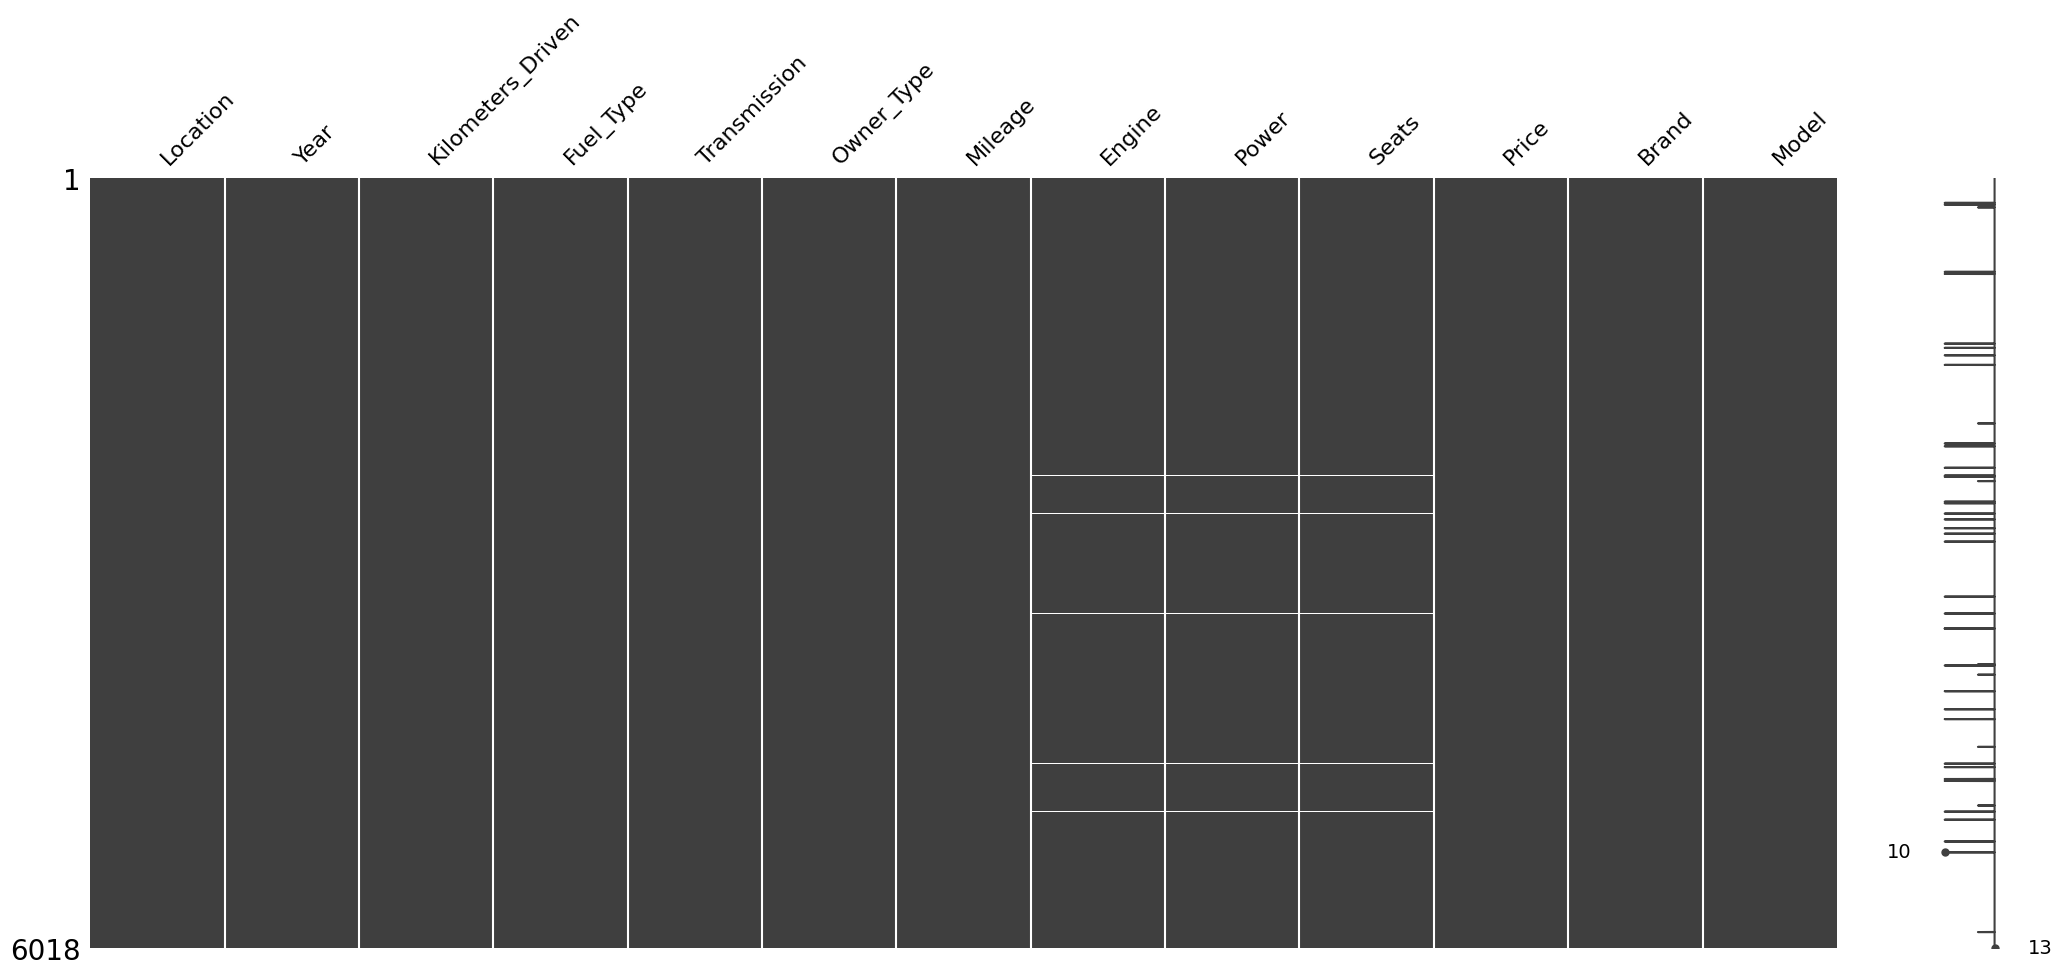

In [25]:
import missingno as msno

msno.matrix(df)

<Axes: >

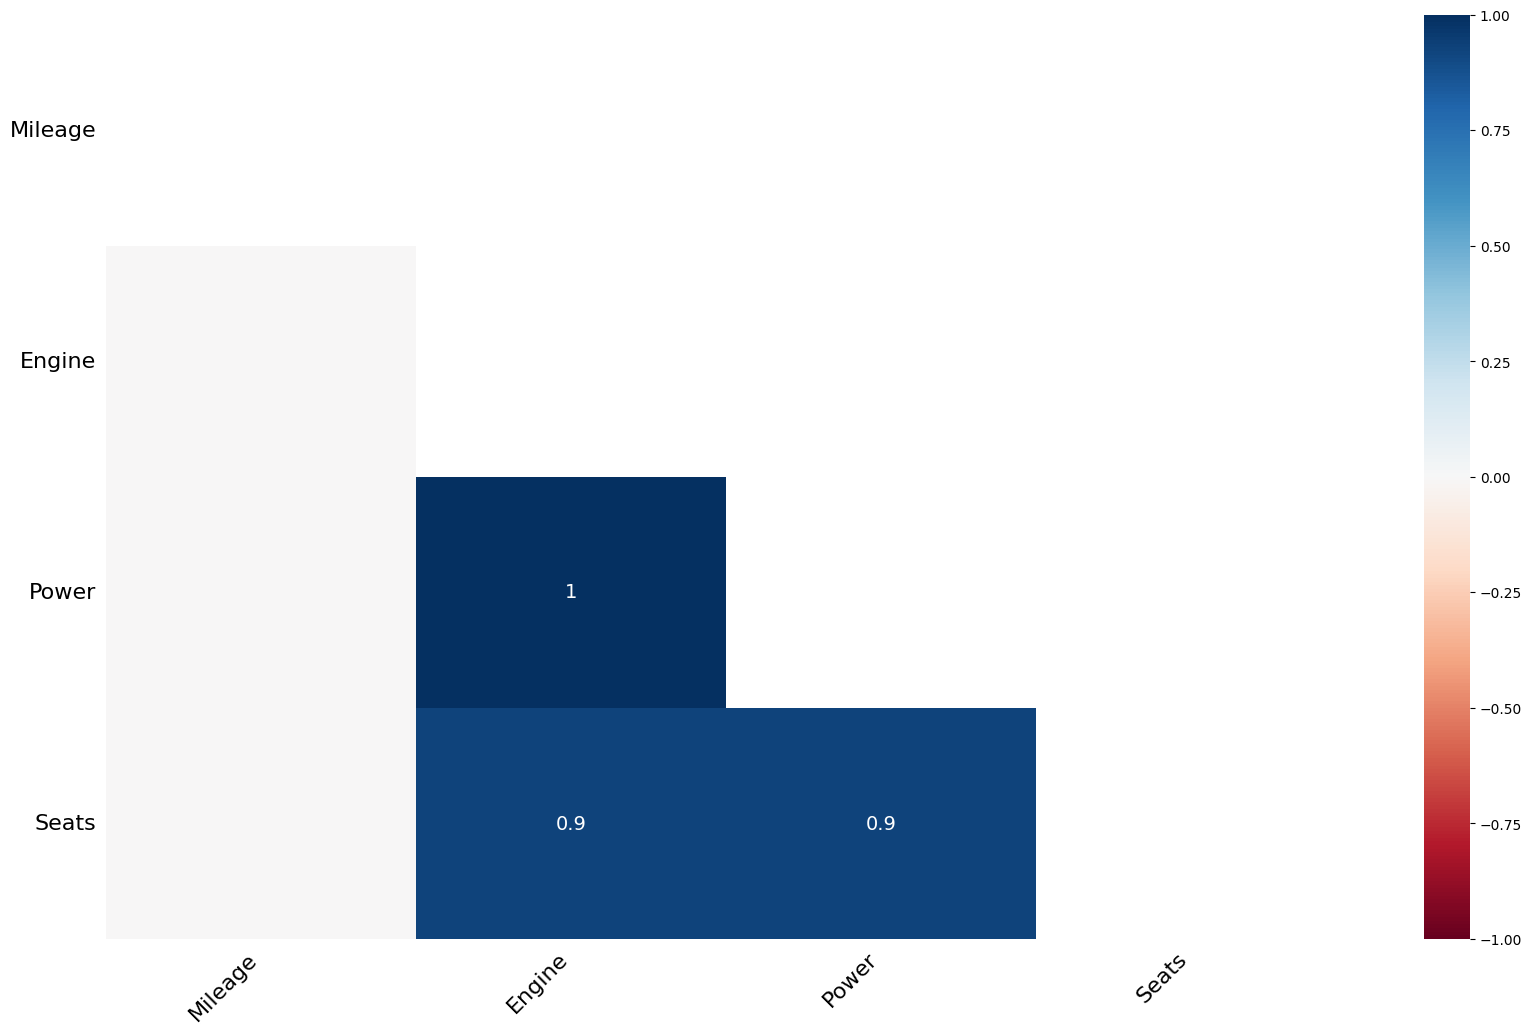

In [26]:
msno.heatmap(df)

In [27]:
df[df.Power.isna()]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
194,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,2.95,Honda,City
208,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,2.11,Maruti,Swift
733,Chennai,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,NaN,NaN,1.75,Maruti,Swift
749,Mumbai,2008,55001,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,NaN,26.50,Land Rover,Range Rover
1294,Delhi,2009,55005,Petrol,Manual,First,12.8 kmpl,NaN,NaN,NaN,3.20,Honda,City
1327,Hyderabad,2015,50295,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,5.80,Maruti,Swift
1385,Pune,2004,115000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN,1.50,Honda,City
1460,Coimbatore,2008,69078,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,40.88,Land Rover,Range Rover
2074,Pune,2011,24255,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,3.15,Maruti,Swift
2096,Coimbatore,2004,52146,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,1.93,Hyundai,Santro


* Mileage is missing in case of "Electric" cars.  
👉 Impute EV mileage as 0 and add a mileage_missing flag.

* Engine, Power and Seats are mostly missing together.  
👉 We will impute using median and add missing indicator.



# Mileage

In [28]:
df.Mileage.str.split(' ').str[1].unique()

array(['km/kg', 'kmpl', nan], dtype=object)

In [29]:
df.Fuel_Type.unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [30]:
# fuel densities (kg/L)
fuel_densities = {
    "CNG": 0.43,
    "Diesel": 0.832,
    "Petrol": 0.74,
    "LPG": 0.54,
    "Electric": 0
}

def convert_to_kmpl(row):
    if not pd.isna(row['Mileage']):
        fuel = row['Fuel_Type']
        mileage = float(row['Mileage'].split()[0])
        unit = row['Mileage'].split()[1] 
        
        if unit == 'km/kg':
            return mileage * fuel_densities[fuel]
        else:
            return mileage

# Apply conversion to DataFrame
df['Mileage'] = df.apply(convert_to_kmpl, axis=1)

In [31]:
df['Mileage'].describe()

count    6016.000000
mean       17.985634
std         4.557194
min         0.000000
25%        15.100000
50%        18.000000
75%        20.920000
max        28.400000
Name: Mileage, dtype: float64

# Engine

In [32]:
df.Engine.str.split(' ').str[1].unique()

array(['CC', nan], dtype=object)

In [33]:
def get_engine(engine):
    if not pd.isna(engine):
        return float(engine.split(' ')[0]) 

df['Engine'] = df['Engine'].apply(get_engine)

# Power

In [34]:
df.Power.str.split(' ').str[1].unique()

array(['bhp', nan], dtype=object)

In [35]:
df.Power.sample(10)

5843        85 bhp
2901        74 bhp
4126    138.08 bhp
2090     67.04 bhp
4780     126.2 bhp
2070      67.1 bhp
4769      40.3 bhp
3626        68 bhp
5441       197 bhp
3148     187.7 bhp
Name: Power, dtype: object

In [36]:
def get_power(power):
    try:
        return float(power.split(' ')[0])
    except:
        return np.nan

df['Power'] = df['Power'].apply(get_power)

In [37]:
df.isna().sum()

Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
Brand                  0
Model                  0
dtype: int64

# Seats

In [38]:
# Remove zeros in Seats
df[df.Seats == 0].shape

(1, 13)

In [39]:
df = df[df.Seats != 0]

In [40]:
df.Seats.value_counts(normalize=True) * 100

Seats
5.0     83.899582
7.0     11.280335
8.0      2.242678
4.0      1.656904
6.0      0.518828
2.0      0.267782
10.0     0.083682
9.0      0.050209
Name: proportion, dtype: float64

# Price

In [41]:
df[df.Price > 100]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
4079,Hyderabad,2017,25000,Diesel,Automatic,First,13.33,2993.0,255.0,5.0,160.0,Land Rover,Range Rover
5781,Delhi,2011,6500,Petrol,Automatic,Third,6.40,5204.0,560.0,2.0,120.0,Lamborghini,Gallardo


In [42]:
# Remove outliers Where Price > 100
df = df[df.Price <= 100]

# Some Analysis

In [43]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Mumbai,2010,72000,CNG,Manual,First,11.438,998.0,58.16,5.0,1.75,Maruti,Wagon
1,Pune,2015,41000,Diesel,Manual,First,19.670,1582.0,126.20,5.0,12.50,Hyundai,Creta
2,Chennai,2011,46000,Petrol,Manual,First,18.200,1199.0,88.70,5.0,4.50,Honda,Jazz
3,Chennai,2012,87000,Diesel,Manual,First,20.770,1248.0,88.76,7.0,6.00,Maruti,Ertiga
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200,1968.0,140.80,5.0,17.74,Audi,A4


In [44]:
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6015.000000,6015.000000,6013.000000,5979.000000,5873.000000,5973.000000,6015.000000
mean,2013.357606,57670.791521,17.989580,1619.954842,113.128200,5.280261,9.425423
std,3.269967,37870.190126,4.554461,598.895895,53.507006,0.805087,10.905359
min,1998.000000,171.000000,0.000000,72.000000,34.200000,2.000000,0.440000
25%,2011.000000,34000.000000,15.100000,1198.000000,75.000000,5.000000,3.500000
50%,2014.000000,53000.000000,18.000000,1493.000000,97.700000,5.000000,5.630000
75%,2016.000000,73000.000000,20.920000,1984.000000,138.100000,5.000000,9.950000
max,2019.000000,775000.000000,28.400000,5998.000000,552.000000,10.000000,100.000000


In [45]:
df.describe(include='O')

,Location,Fuel_Type,Transmission,Owner_Type,Brand,Model
count,6015,6015,6015,6015,6015,6015
unique,11,5,2,4,30,213
top,Mumbai,Diesel,Manual,First,Maruti,Swift
freq,790,3203,4299,4926,1211,353


In [46]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

for col in numeric_cols:
    fig = px.histogram(df, x=col, marginal='box', title=f'Distribution of {col}', nbins=30)
    fig.show()

In [47]:
df.shape

(6015, 13)

In [48]:
df.isna().sum()

Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                142
Seats                 42
Price                  0
Brand                  0
Model                  0
dtype: int64

<Axes: >

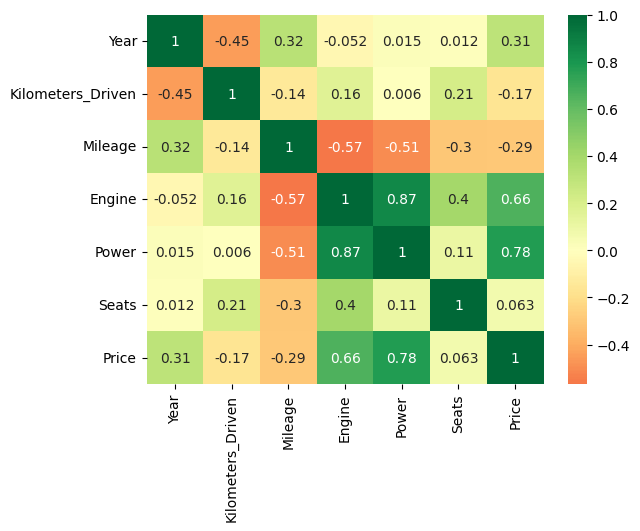

In [49]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdYlGn', center=0)

In [50]:
asc_num_features = df.corr(numeric_only=True)['Price'].sort_values(ascending=False)
asc_num_features 

Price                1.000000
Power                0.775852
Engine               0.660987
Year                 0.311195
Seats                0.062727
Kilometers_Driven   -0.168420
Mileage             -0.290879
Name: Price, dtype: float64

In [51]:
px.bar(asc_num_features, width=600, category_orders={'index':asc_num_features.index}, orientation='h')

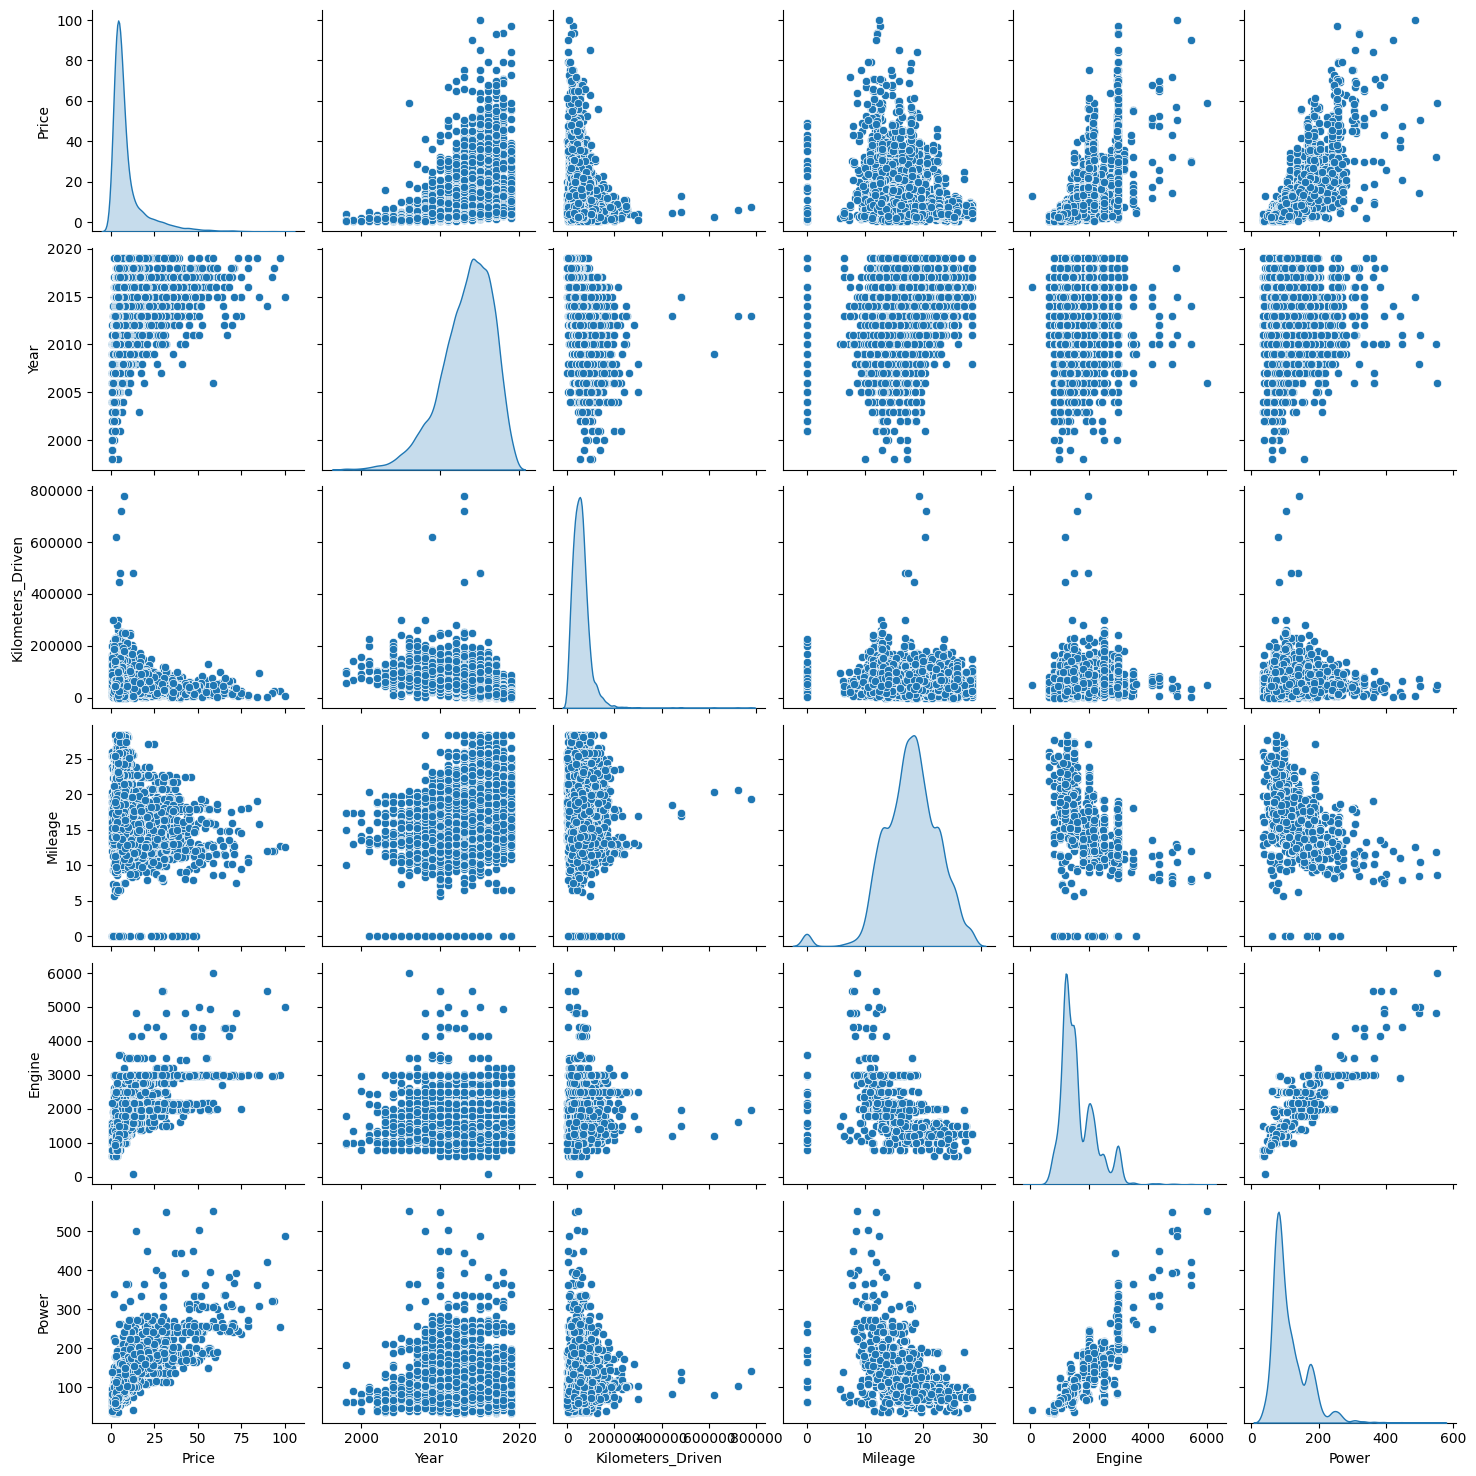

In [52]:
sns.pairplot(df[['Price', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power']], diag_kind='kde')

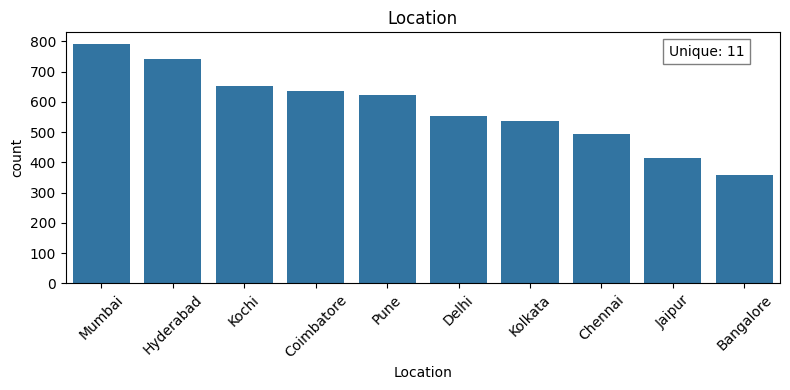

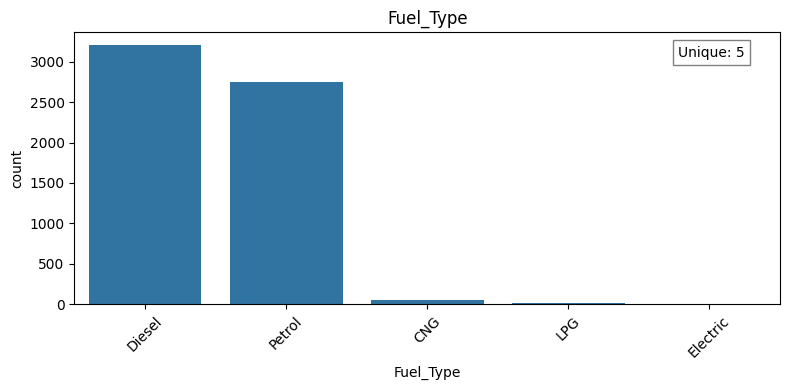

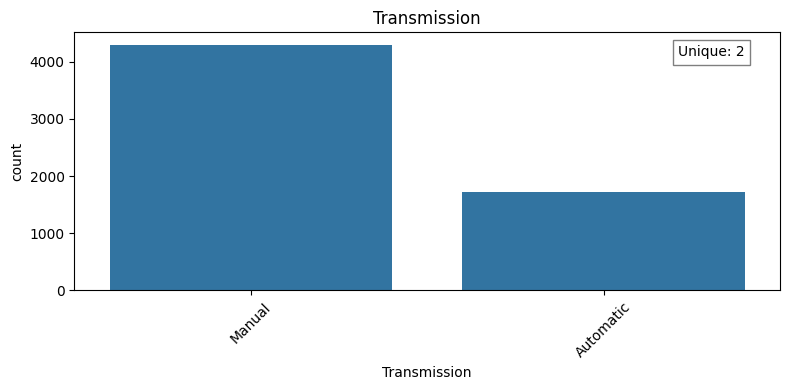

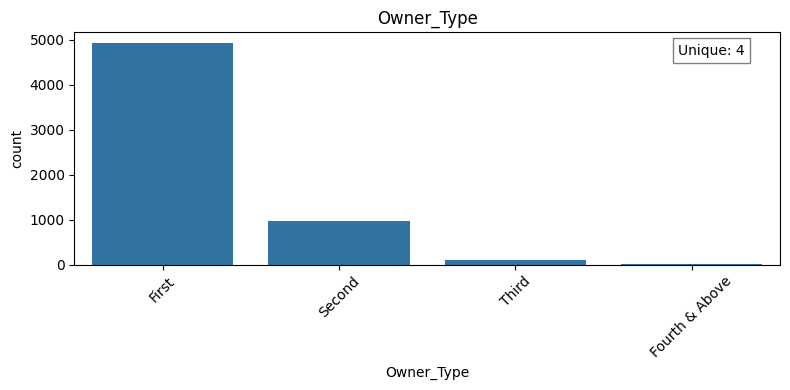

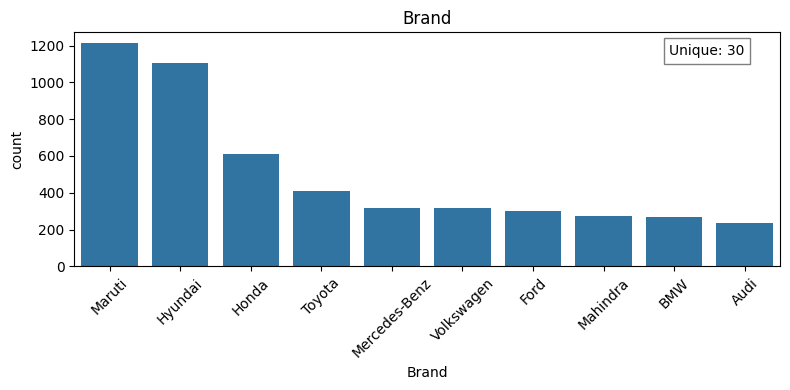

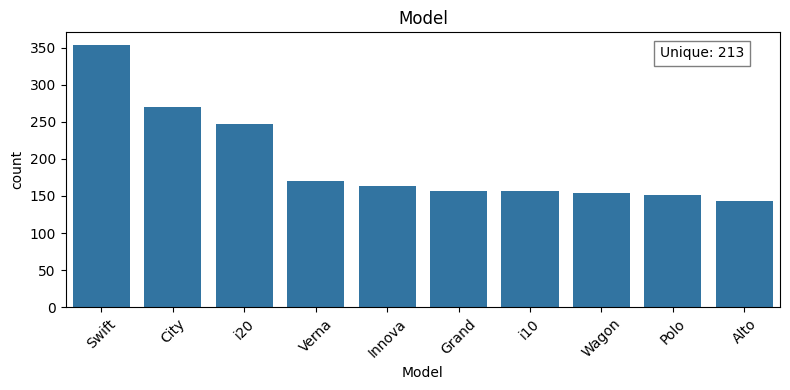

In [54]:
def univariable_categorical(df):
    cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    # Plot Bar plots for categorical features (top 10 categories)
    for col in cat_cols:
        # Get top 10 categories
        top_10 = df[col].value_counts().nlargest(10)
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=col, order=top_10.index)
        plt.title(f'{col}')
        plt.xticks(rotation=45)
        # Annotate No. of unique values with box
        n_unique = df[col].nunique()
        plt.text(0.95, 0.95, f'Unique: {n_unique}', horizontalalignment='right', verticalalignment='top', 
                 transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
        plt.tight_layout()
        plt.show()

univariable_categorical(df)

* `Brand` and `Model` are nominal categorical features with high cardinality.  
   binary encoding
* `Location` is a nominal categorical feature with medium cardinality.
   binary encoding
* `Transmission` is a binary categorical feature.
    one-hot encoding (take care of drop first)
* `Fuel_Type` is a nominal categorical feature with some rare categories.
    one-hot encoding (take care of rare categories)
* `Owner_Type` is an ordinal categorical feature.
   ordinal encoder

# Saving the Cleaned Data

In [53]:
df.to_csv('../data/semi_cleaned_data.csv', index=False)

👉 We need to handle :
* Missing Values.
* Outliers.
* Categorical.